In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

os.environ["CUDA_VISIBLE_DEVICES"]='0'

In [2]:
#Read all VMAF outputs into lists
storage_dir = './log/test-reconstruction-vox/prediction/'
no_pred_vmaf = []
for output_num in range(0,44):
    with open(storage_dir + 'vmaf_json_output_no_pred' + f'/vmaf_{output_num:02d}.json','r') as file:
        no_pred_vmaf.append(json.load(file))
rnn_vmaf = []
for output_num in range(0,44):
    with open(storage_dir + 'vmaf_json_output_rnn' + f'/vmaf_{output_num:02d}.json','r') as file:
        rnn_vmaf.append(json.load(file))
vae_vmaf = []
for output_num in range(0,44):
    with open(storage_dir + 'vmaf_json_output_vae' + f'/vmaf_{output_num:02d}.json','r') as file:
        vae_vmaf.append(json.load(file))
vrnn_vmaf = []
for output_num in range(0,44):
    with open(storage_dir + 'vmaf_json_output_vrnn' + f'/vmaf_{output_num:02d}.json','r') as file:
        vrnn_vmaf.append(json.load(file))

In [ ]:
#Put all VMAF scores into list variables
no_pred_scores = []
for score in no_pred_vmaf:
    no_pred_scores.append(score['pooled_metrics']['vmaf']['mean'])
rnn_scores = []
for score in rnn_vmaf:
    rnn_scores.append(score['pooled_metrics']['vmaf']['mean'])
vae_scores = []
for score in vae_vmaf:
    vae_scores.append(score['pooled_metrics']['vmaf']['mean'])
vrnn_scores = []
for score in vrnn_vmaf:
    vrnn_scores.append(score['pooled_metrics']['vmaf']['mean'])

In [ ]:
#Set up bar chart - with MEANS
algorithms = ['No Prediction','VRNN','RNN','VAE']
means = [np.mean(no_pred_scores),np.mean(vrnn_scores),np.mean(rnn_scores),np.mean(vae_scores)]

plt.bar(algorithms, means, color=['green','red','blue','orange'])
plt.xlabel('Algorithms')
plt.ylabel('Mean VMAF Score')
plt.title('Mean VMAF Score by Algorithm')

In [ ]:
#Set up bar chart - with MEDIANS
medians = [np.median(no_pred_scores),np.median(vrnn_scores),np.median(rnn_scores),np.median(vae_scores)]

plt.bar(algorithms, medians, color=['green','red','blue','orange'])

plt.xlabel('Algorithms')
plt.ylabel('Median VMAF Score')
plt.title('Median VMAF Score by Algorithm')

In [ ]:
#Line graph of all four algorithms' per-video scores
video_nums = list(range(1,45))

# Add all data series
plt.plot(video_nums, no_pred_scores, label='No Prediction', color='green', marker='o')
plt.plot(video_nums, rnn_scores, label='RNN', color='orange', marker='o')
plt.plot(video_nums, vae_scores, label='VAE', color='blue', marker='o')
plt.plot(video_nums, vrnn_scores, label='VRNN', color='red', marker='o')
#markerfacecolor

# Add labels and title
plt.xlabel('Video Number')
plt.ylabel('VMAF Score')
plt.title('VMAF Score Per Video for All Algorithms')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
#Bar Chart with Percent of Maximum
algorithms = ['VRNN','RNN','VAE']
max_mean = np.mean(no_pred_scores)
input = [(np.mean(vrnn_scores)/max_mean)*100,(np.mean(rnn_scores)/max_mean)*100,(np.mean(vae_scores)/max_mean)*100]

plt.bar(algorithms, height=input, color=['red','blue','orange'])
plt.ylim(0,100)
plt.xlabel('Algorithms')
plt.ylabel('Percent of No-Prediction VMAF Scores')
plt.title('VMAF Performance by Prediction Algorithm')

In [ ]:
#Histogram with No Prediction - Normalized
example_vid = no_pred_vmaf[10]
example_frames = []
for i in range (0,120):
    example_frames.append(example_vid['frames'][i]['metrics']['vmaf'])
frame_max = np.max(example_frames)
frames_norm = (example_frames/frame_max)*100

# Create the histogram
plt.hist(frames_norm, bins=15, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('VMAF Scores (% of Maximum)')
plt.ylabel('Frequency')
plt.title('Frame-by-Frame VMAF Score Distribution with No Prediction')


In [ ]:
#Histogram with VRNN - Normalized
example_vid = vrnn_vmaf[10]
example_frames = []
for i in range (0,120):
    example_frames.append(example_vid['frames'][i]['metrics']['vmaf'])
frame_max = np.max(example_frames)
frames_norm = (example_frames/frame_max)*100

# Create the histogram
plt.hist(frames_norm, bins=15, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('VMAF Scores (% of Maximum)')
plt.ylabel('Frequency')
plt.title('Frame-by-Frame VMAF Score Distribution with VRNN')


In [ ]:
#Histogram with RNN - Normalized
example_vid = rnn_vmaf[10]
example_frames = []
for i in range (0,120):
    example_frames.append(example_vid['frames'][i]['metrics']['vmaf'])
frame_max = np.max(example_frames)
frames_norm = (example_frames/frame_max)*100

# Create the histogram
plt.hist(frames_norm, bins=15, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('VMAF Scores (% of Maximum)')
plt.ylabel('Frequency')
plt.title('Frame-by-Frame VMAF Score Distribution with RNN')


In [ ]:
#Histogram with RNN - Normalized
example_vid = vae_vmaf[10]
example_frames = []
for i in range (0,120):
    example_frames.append(example_vid['frames'][i]['metrics']['vmaf'])
frame_max = np.max(example_frames)
frames_norm = (example_frames/frame_max)*100

# Create the histogram
plt.hist(frames_norm, bins=15, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('VMAF Scores (% of Maximum)')
plt.ylabel('Frequency')
plt.title('Frame-by-Frame VMAF Score Distribution with VAE')


In [ ]:
x = 3
int('{0:02b}'.format(x)[0])

In [ ]:
#Histogram with No Prediction - Normalized
from sklearn.neighbors import KernelDensity

models = [no_pred_vmaf,rnn_vmaf,vae_vmaf,vrnn_vmaf]
model_names = ["No Prediction (FOSS)", "RNN", "VAE", "VRNN"]
# fig, axs = plt.subplots(2, 2)
# fig.suptitle('Kernel Density Plots of VMAF scores for each video')
for i, model in enumerate(models):
    # extracts VMAF scores for every frame for every video
    vmaf_for_every_vid = [[frame['metrics']['vmaf'] for frame in vid['frames']] for vid in model]
    
    X_plot = np.linspace(0, 100, 1000)[:, np.newaxis]
    # plot kernel density, documentation here https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
    for vid in vmaf_for_every_vid:
        kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(np.array(vid).reshape(-1, 1))
        log_dens = kde.score_samples(X_plot)
        plt.plot(
            X_plot[:, 0],
            np.exp(log_dens),
            color='navy',
            alpha=0.2,
            lw=1,
            linestyle="-",
            label="kernel = '{0}'".format("gaussian"),
        )
    plt.title(model_names[i])
    plt.show()


In [ ]:
#Histogram with No Prediction - Normalized
vmaf_for_every_vid = [vid['frames'][i]['metrics']['vmaf']] for vid in no_pred_vmaf]
example_vid = no_pred_vmaf[10]
example_frames = []
for i in range (0,120):
    example_frames.append(example_vid['frames'][i]['metrics']['vmaf'])
frame_max = np.max(example_frames)
frames_norm = (example_frames/frame_max)*100

# Create the histogram
plt.hist(frames_norm, bins=15, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('VMAF Scores (% of Maximum)')
plt.ylabel('Frequency')
plt.title('Frame-by-Frame VMAF Score Distribution with No Prediction')


/tmp/ipykernel_6701/1584938623.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(2, 2)


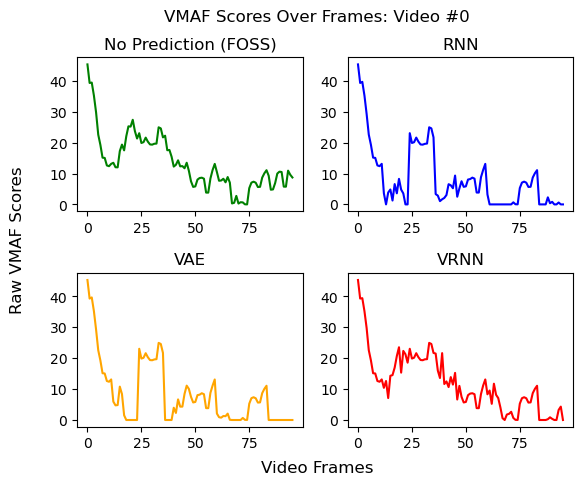

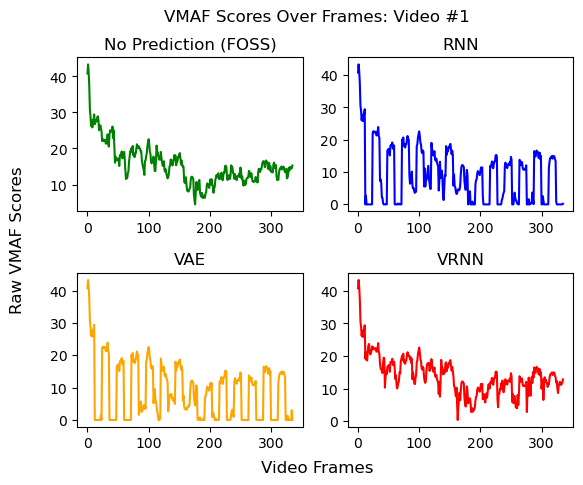

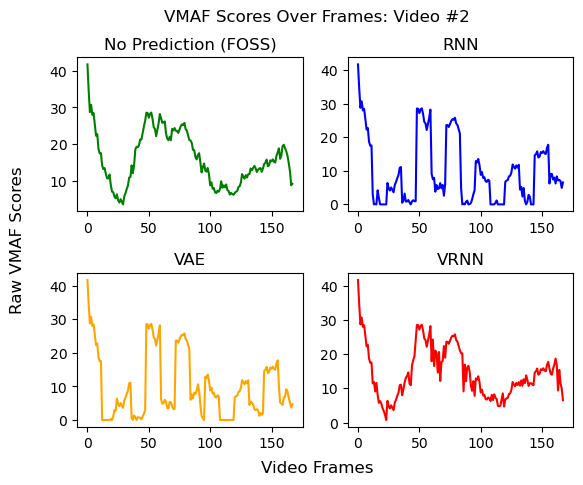

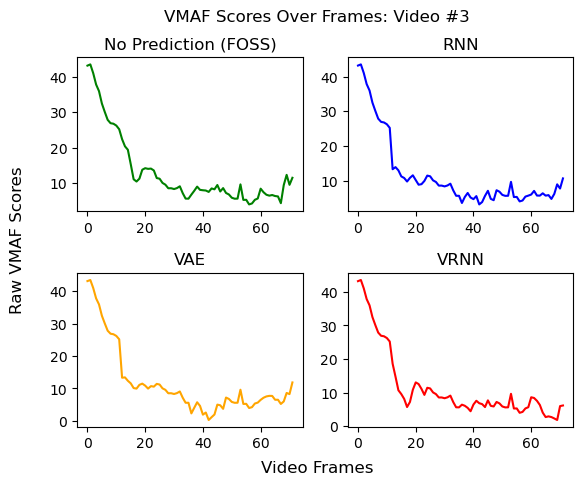

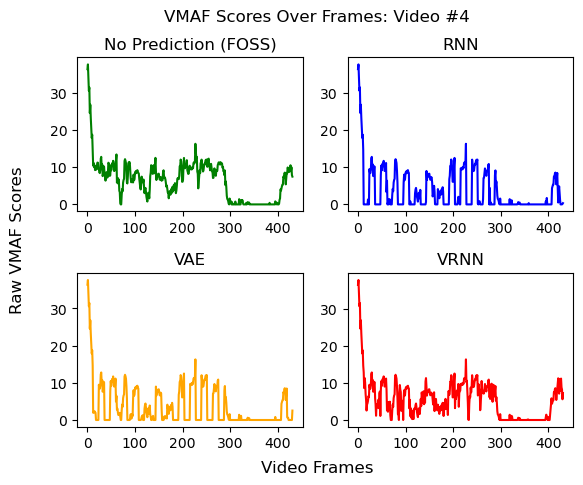

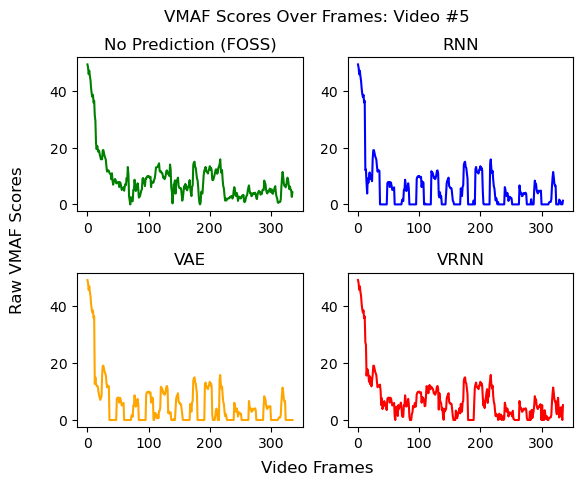

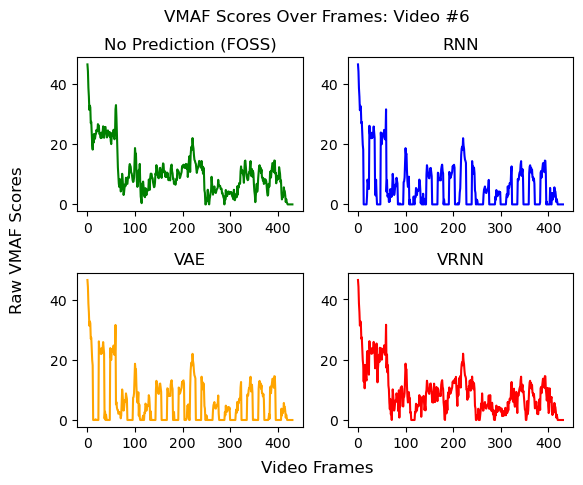

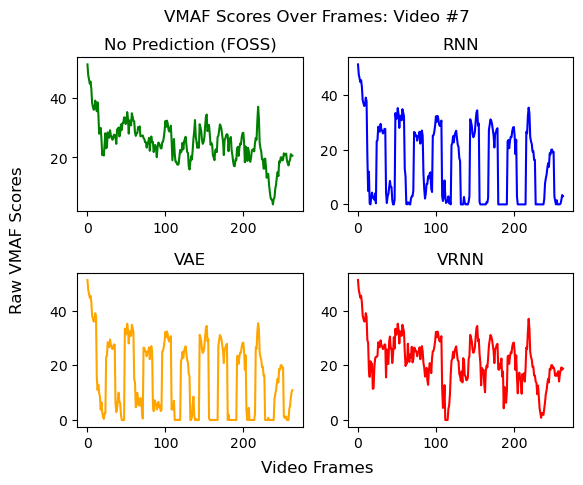

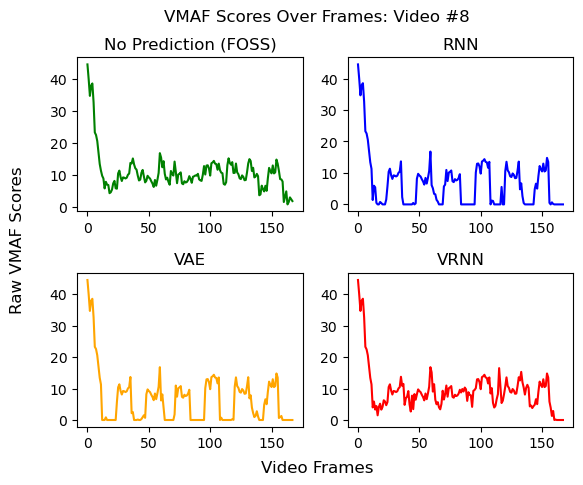

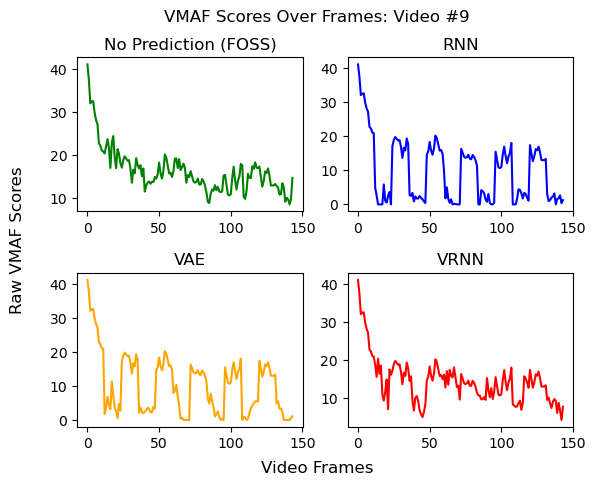

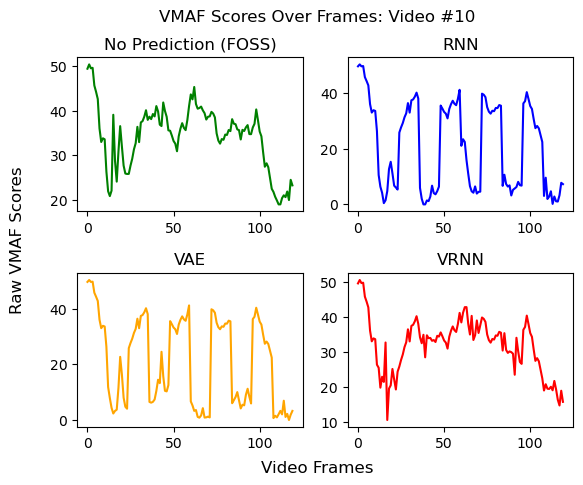

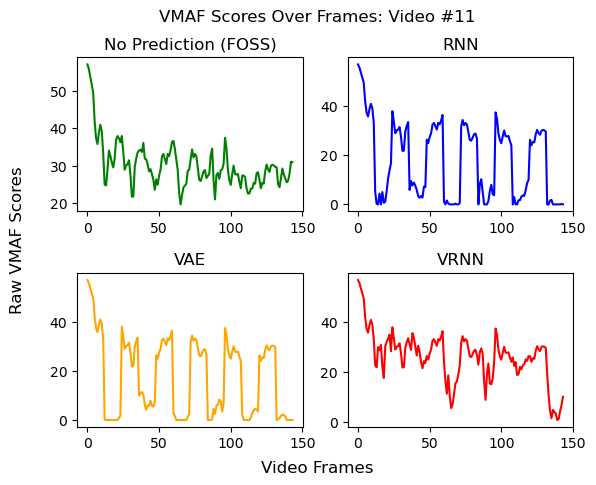

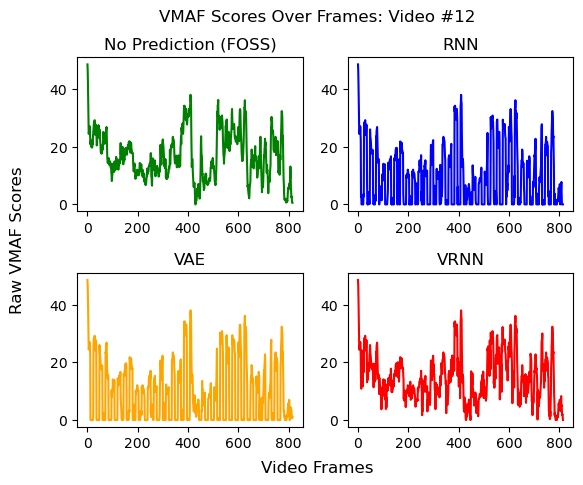

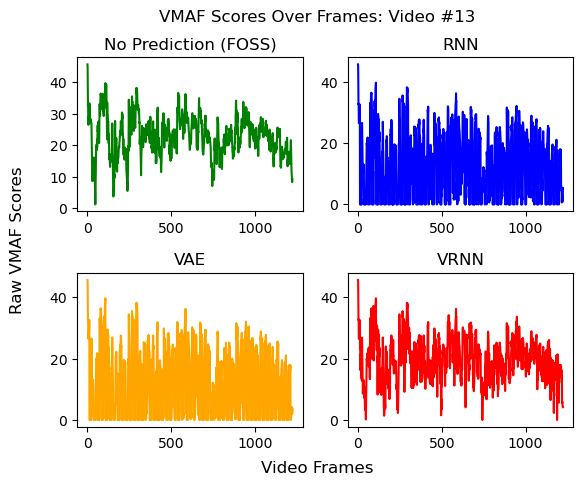

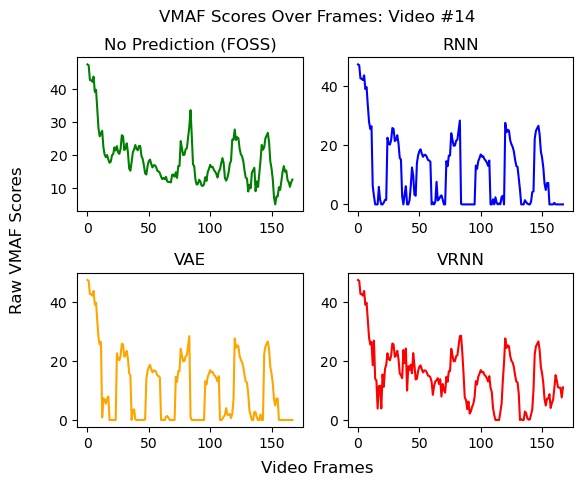

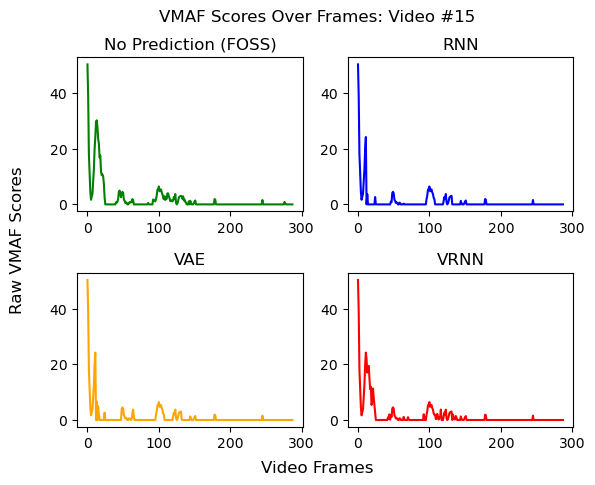

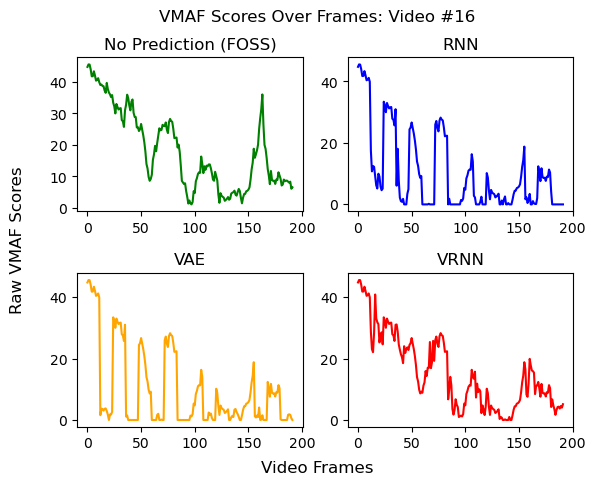

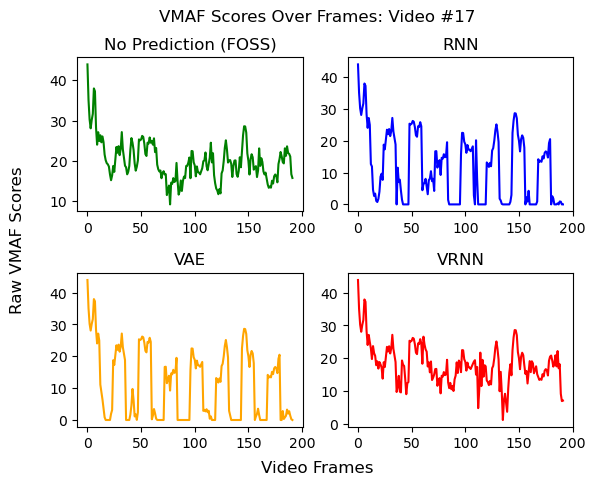

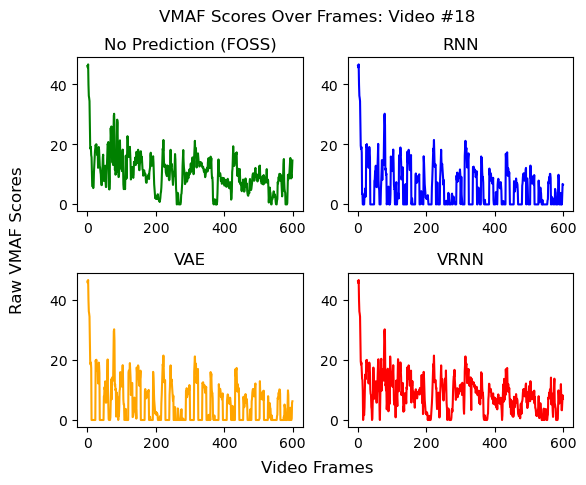

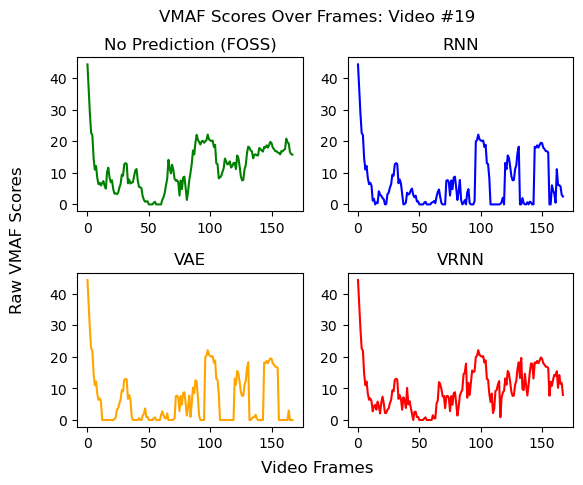

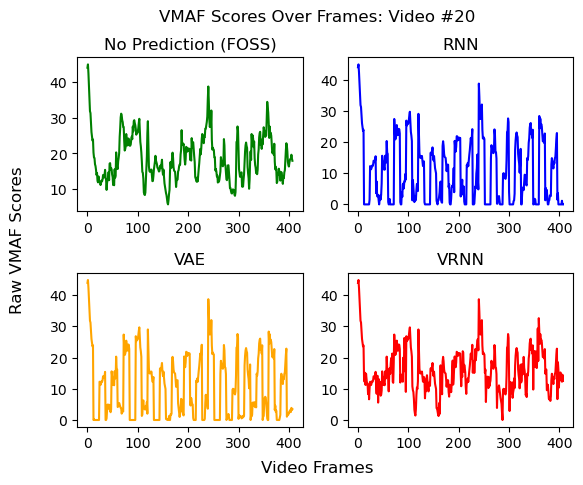

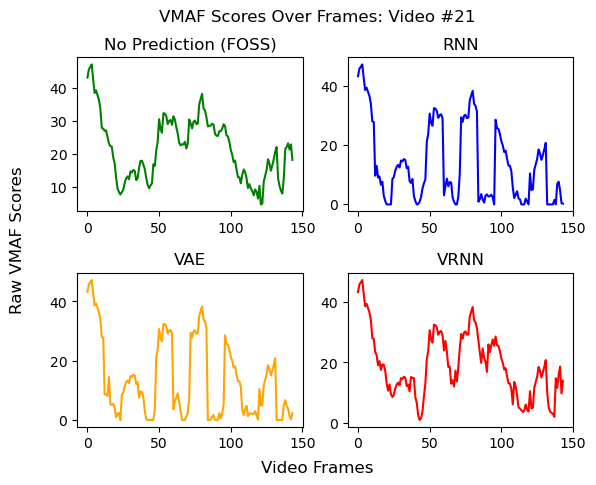

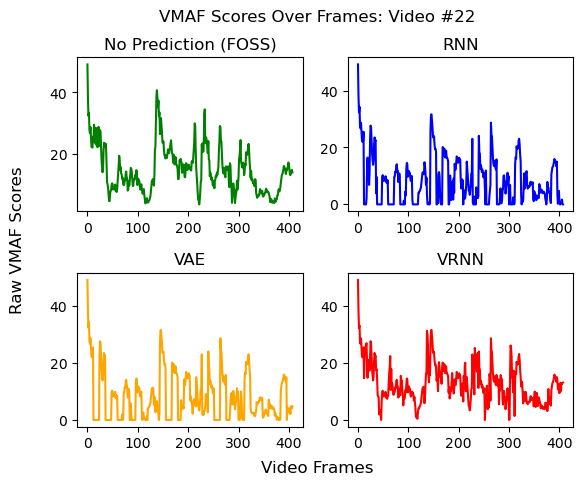

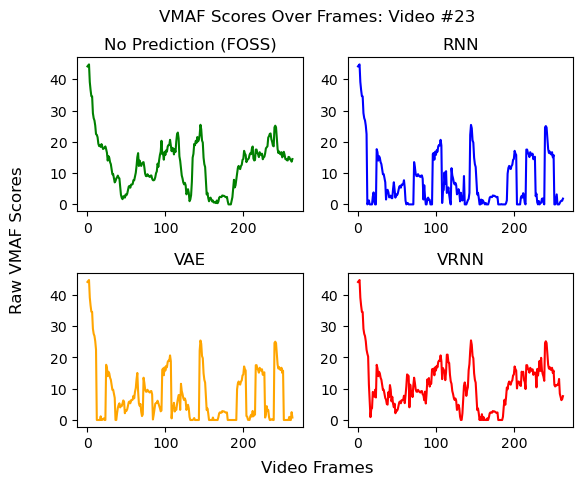

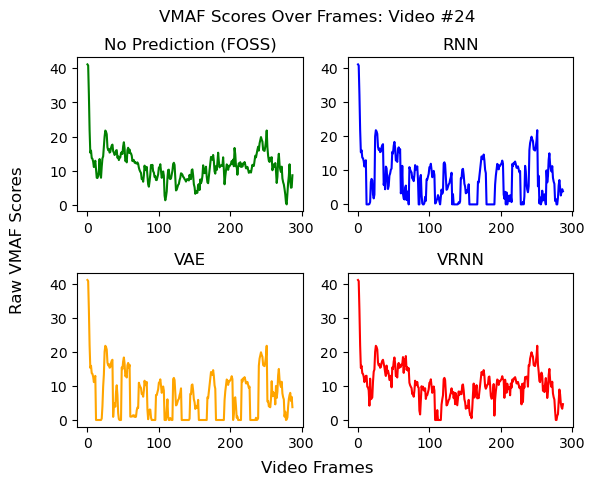

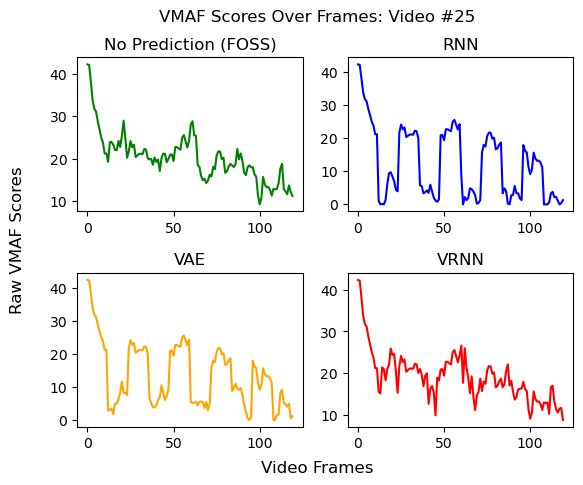

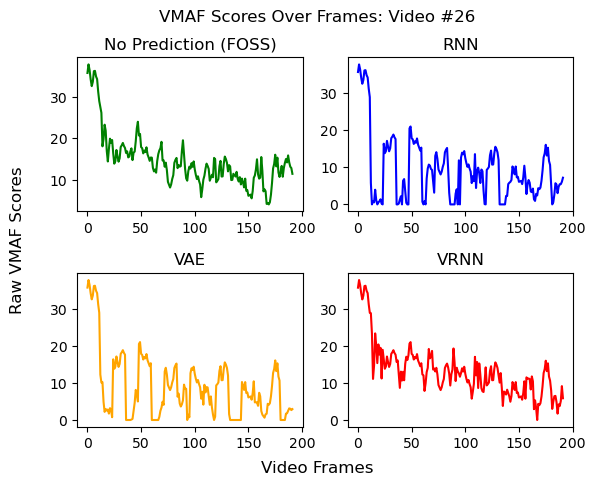

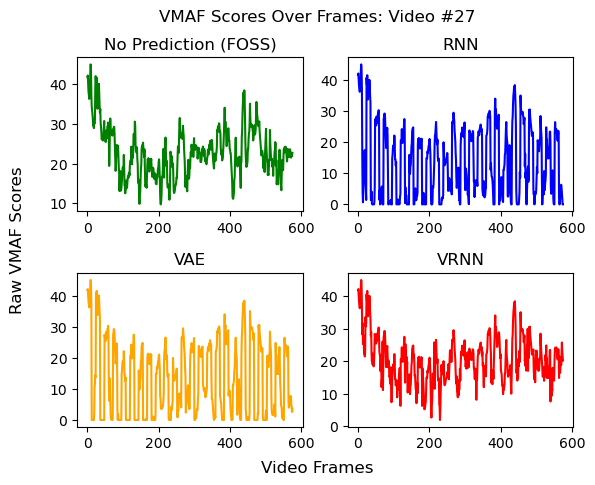

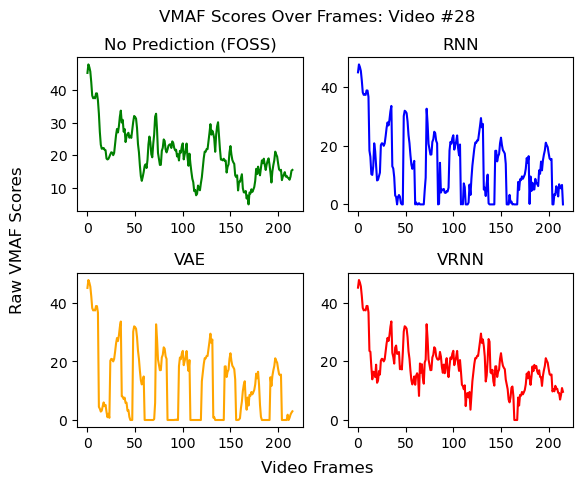

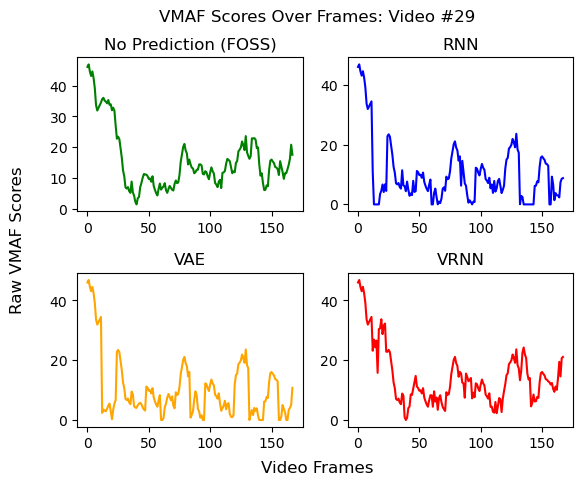

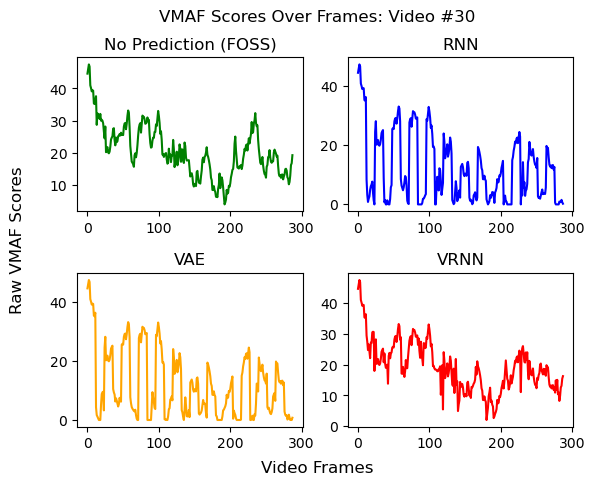

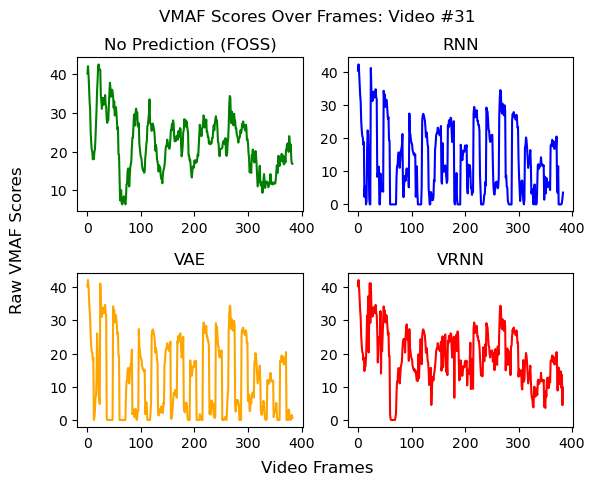

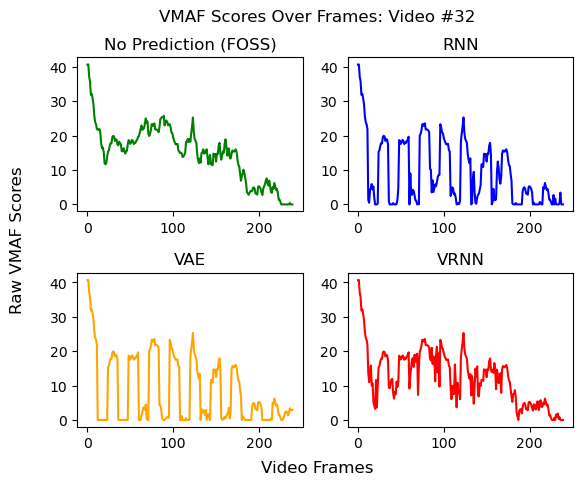

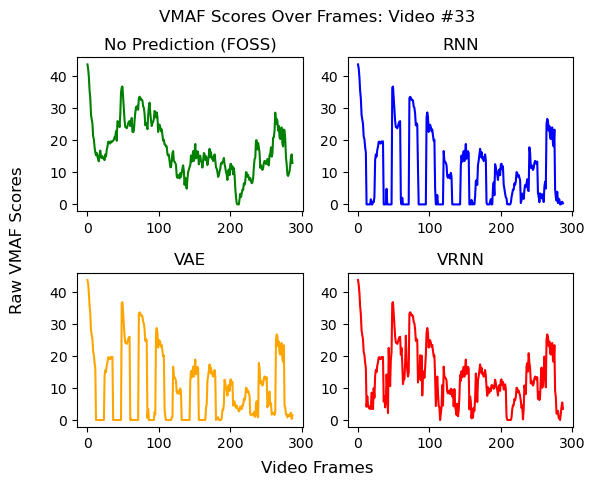

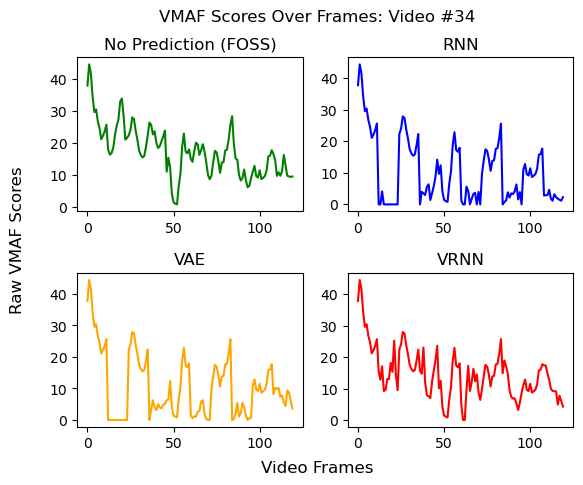

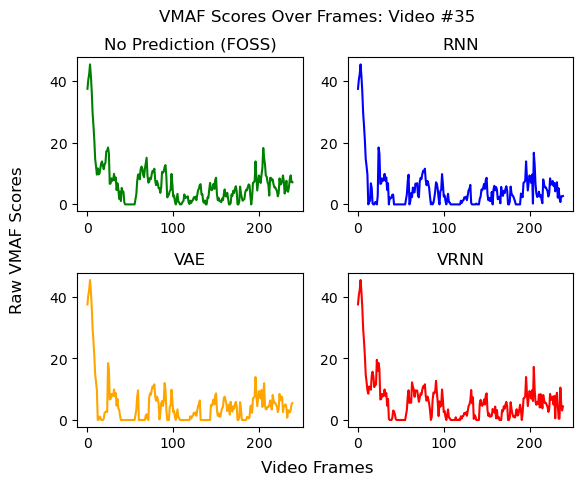

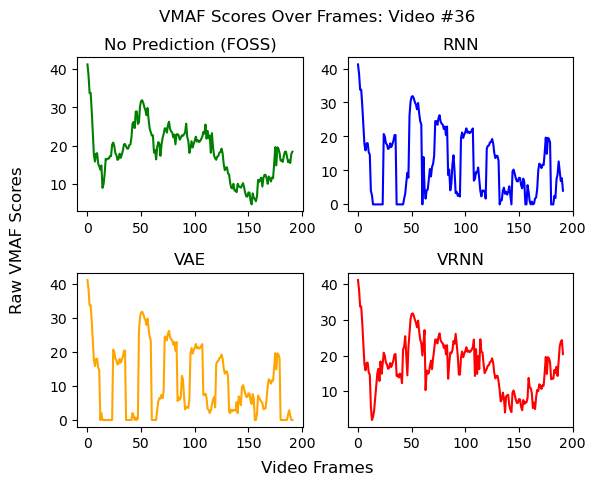

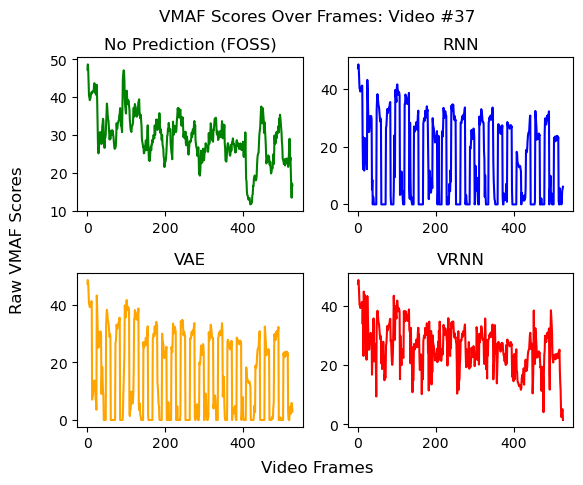

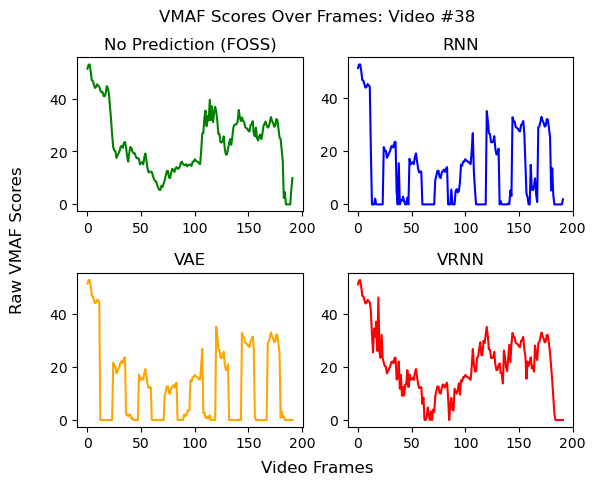

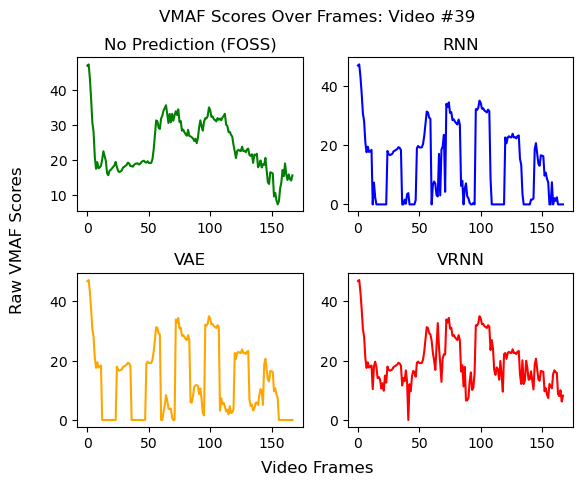

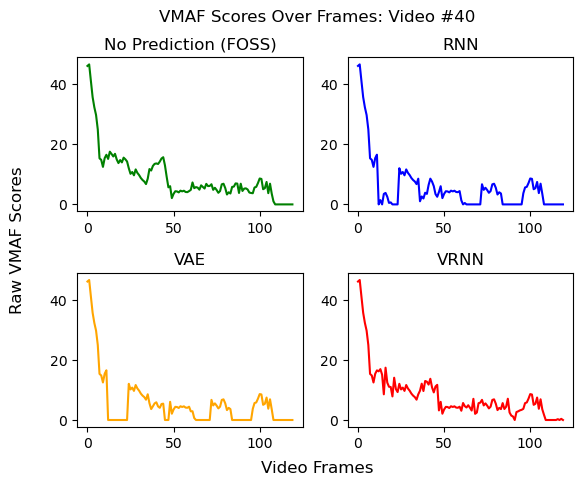

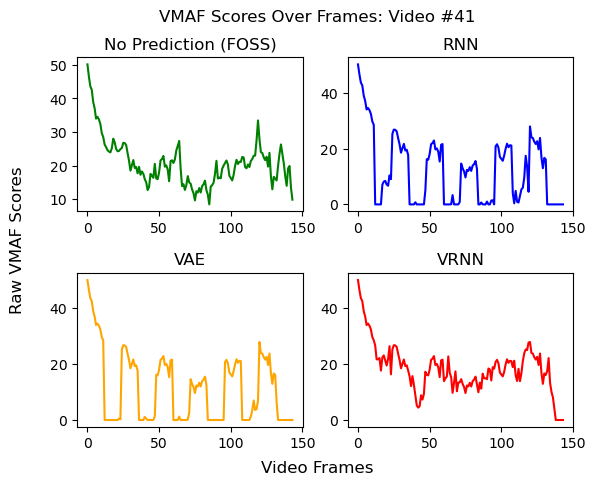

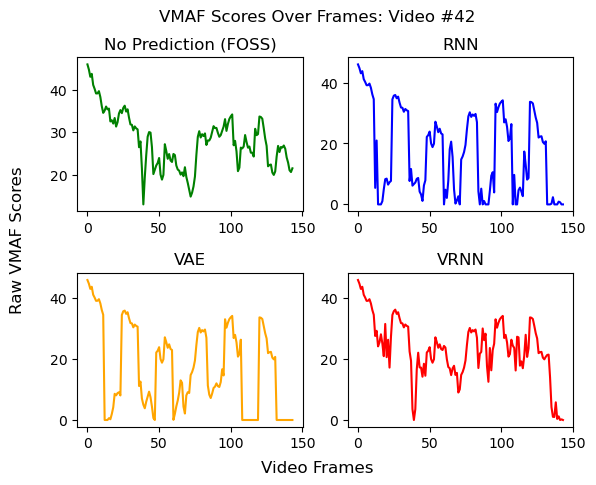

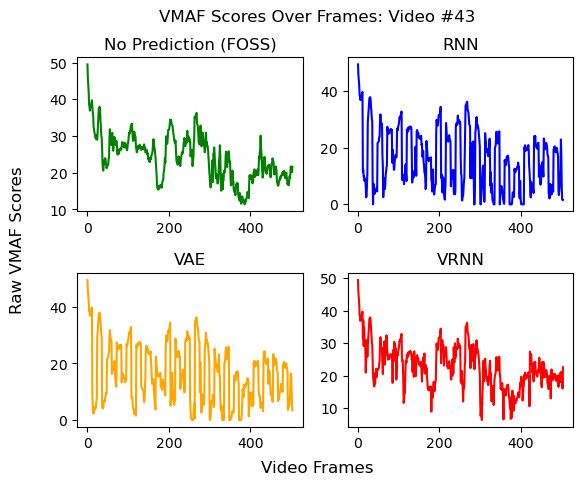

In [9]:
#Combined time series for VMAF no_pred_vmaf (in progress)

models = [no_pred_vmaf,rnn_vmaf,vae_vmaf,vrnn_vmaf]
model_names = ["No Prediction (FOSS)", "RNN", "VAE", "VRNN"]
colors = ['green', 'blue', 'orange', 'red']

for vidNum in range(len(no_pred_vmaf)):
    fig, axs = plt.subplots(2, 2)
    fig.suptitle(f'VMAF Scores Over Frames: Video #{vidNum}')
    for i, model in enumerate(models):
        # calculates the row and column of the subplot to insert into
        row = int('{0:02b}'.format(i)[0])
        column = int('{0:02b}'.format(i)[1])
        
        vmaf_scores = [frame['metrics']['vmaf'] for frame in model[vidNum]['frames']]
        axs[row, column].plot(vmaf_scores, color=colors[i])  
        axs[row, column].set_title(model_names[i])
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    fig.supxlabel("Video Frames")
    fig.supylabel("Raw VMAF Scores")
    fig.show()
    fig.savefig(f'figures/VMAF Over Frames/{vidNum}_vmaf_over_frames.svg', format='svg', bbox_inches='tight')

# fig, axs = plt.subplots(2, 2)
# fig.suptitle('Kernel Density Plots of VMAF scores for each video')
# for i, model in enumerate(models):
#     vmaf_for_every_vid = [[frame['metrics']['vmaf'] for frame in vid['frames']] for vid in model]
#     for vid in vmaf_for_every_vid:
#         axs[int('{0:02b}'.format(i)[0]), int('{0:02b}'.format(i)[1])].plot(vid)
#     axs[int('{0:02b}'.format(i)[0]), int('{0:02b}'.format(i)[1])].set_title(model_names[i])
#     fig.show()